# Bank marketing

### http://archive.ics.uci.edu/ml/datasets/Bank+Marketing

#### The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 
Dataset - bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).
This dataset has missing values and dissimilar types.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [5]:
data = pd.read_csv('./bank-full.csv', sep = ';', header=0, engine = 'python')

In [6]:
type(data)

pandas.core.frame.DataFrame

In [7]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


Features:

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


#### Column 'y' is the answer (class), renamed to 'deposit'

In [8]:
data = data.rename(columns={"y": "deposit"})

#### Missing values are specified as 'unknown', so changed to NaN to handle it later

In [9]:
data = data.replace({'unknown': np.nan})

In [10]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [11]:
print(data.shape)
print(data.columns)

(45211, 17)
Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')


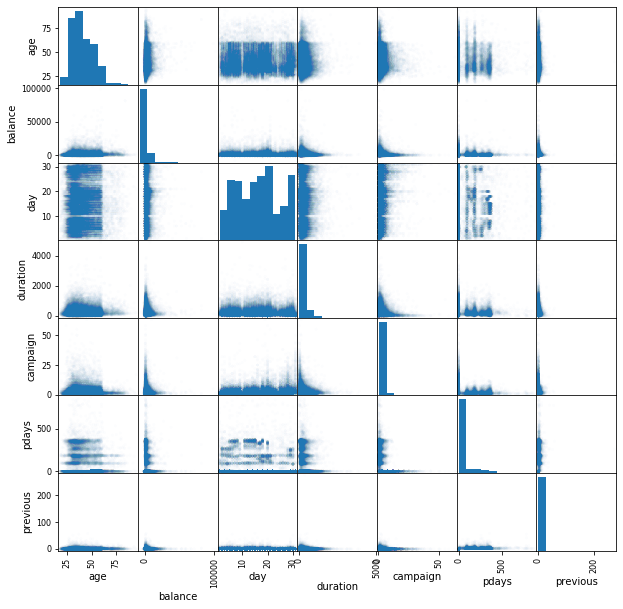

In [12]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = .01, figsize = (10, 10))
pass

In [10]:
data.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


#### Age and balance features relation is pretty insteresting, let's check it visually

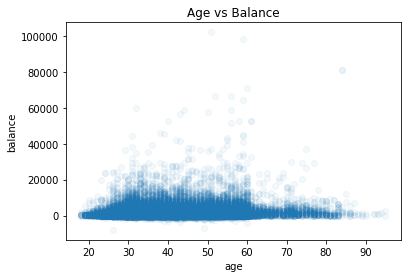

In [11]:
plt.plot(data['age'], data['balance'], 'o', alpha = 0.05)
plt.xlabel('age')
plt.ylabel('balance')
plt.title('Age vs Balance')
pass

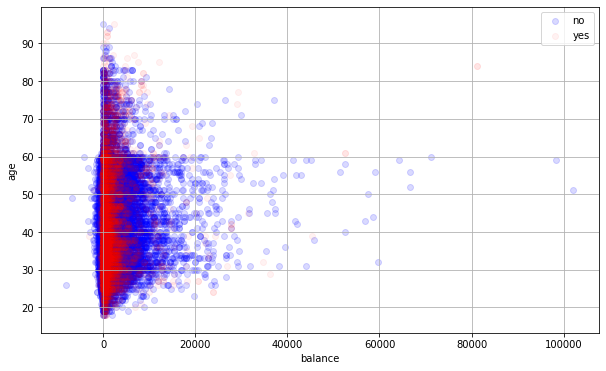

In [12]:
plt.figure(figsize = (10, 6))

plt.scatter(data[data['deposit'] == 'no']['balance'],
            data[data['deposit'] == 'no']['age'],
            alpha = 0.15,
            label = 'no',
            color = 'b')

plt.scatter(data[data['deposit'] == 'yes']['balance'],
            data[data['deposit'] == 'yes']['age'],
            alpha = 0.05,
            label = 'yes',
            color = 'r')

plt.xlabel('balance')
plt.ylabel('age')
plt.legend()
plt.grid()

#### Here we can see how an age is related to balance and how this 'features' affects on the result 'Whether a person has deposit or not'.

In [13]:
data['education'].unique()

array(['tertiary', 'secondary', nan, 'primary'], dtype=object)

In [14]:
data.describe(include = ['object'])

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,44923,45211,43354,45211,45211,45211,32191,45211,8252,45211
unique,11,3,3,2,2,2,2,12,3,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,failure,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,4901,39922


In [15]:
data.describe(include = 'all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
count,45211.000000,44923,45211,43354,45211,45211.000000,45211,45211,32191,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,8252,45211
unique,NaN,11,3,3,2,NaN,2,2,2,NaN,12,NaN,NaN,NaN,NaN,3,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,failure,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,4901,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


## Prepare data

#### Distiguish categorical features from numerical

In [13]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']
['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [14]:
data.median(axis = 0)

age          39.0
balance     448.0
day          16.0
duration    180.0
campaign      2.0
pdays        -1.0
previous      0.0
dtype: float64

#### Fill missing values with median for numerical columns and with 'top' for categorical

In [15]:
data = data.fillna(data.median(axis = 0), axis = 0)

In [16]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


In [17]:
data.describe(include = [object])

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,44923,45211,43354,45211,45211,45211,32191,45211,8252,45211
unique,11,3,3,2,2,2,2,12,3,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,failure,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,4901,39922


In [18]:
data_describe = data.describe(include = [object])
for c in categorical_columns:
    data[c] = data[c].fillna(data_describe[c]['top'])

In [19]:
data['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'retired', 'admin.', 'services', 'self-employed', 'unemployed',
       'housemaid', 'student'], dtype=object)

#### Distinguish binary columns and non-binary

In [20]:
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['default', 'housing', 'loan', 'contact', 'deposit'] ['job', 'marital', 'education', 'month', 'poutcome']


In [21]:
print(data['default'].unique(),
data['housing'].unique(),
data['loan'].unique(),
data['contact'].unique())

['no' 'yes'] ['yes' 'no'] ['no' 'yes'] ['cellular' 'telephone']


#### All binary columns have values from ['yes', 'no']. So let's change it to numbers: 'no' = 0, 'yes' = 1

In [22]:
for c in ['default', 'housing', 'loan']:
    data.at[data[c] == 'no', c] = 0
    data.at[data[c] == 'yes', c] = 1

data.at[data['contact'] == 'cellular', 'contact'] = 0
data.at[data['contact'] == 'telephone', 'contact'] = 1

In [23]:
data['default'].unique()

array([0, 1])

#### Non-binary columns are divided into multiple columns, one for each value in the origin column (via pd.get_dummies)

In [24]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_primary',
       'education_secondary', 'education_tertiary', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success'],
      dtype='object')


## Normalization

In [25]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [26]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)
data_numerical.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04
mean,2.135579e-16,-4.067535e-16,-3.063960e-14,-5.313654e-17,1.723756e-14,1.057063e-13,-1.007183e-13
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.159970e+00,-3.081114e+00,-1.779088e+00,-1.002467e+00,-5.693443e-01,-4.114486e-01,-2.519376e-01
25%,-7.473762e-01,-4.237673e-01,-9.379923e-01,-6.025100e-01,-5.693443e-01,-4.114486e-01,-2.519376e-01
50%,-1.823386e-01,-3.002766e-01,2.326005e-02,-3.035132e-01,-2.465576e-01,-4.114486e-01,-2.519376e-01
75%,6.652178e-01,2.158719e-02,6.240428e-01,2.362344e-01,7.622910e-02,-4.114486e-01,-2.519376e-01
max,5.091346e+00,3.309441e+01,1.825608e+00,1.809450e+01,1.944343e+01,8.297339e+00,1.191347e+02


## Join in one table

In [27]:
data = pd.concat((data_numerical, data_nonbinary, data[binary_columns]), axis = 1)
print(data.shape)

(45211, 44)


In [28]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,default,housing,loan,contact
count,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,45211.000000,45211.000000,45211.000000,...,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,2.135579e-16,-4.067535e-16,-3.063960e-14,-5.313654e-17,1.723756e-14,1.057063e-13,-1.007183e-13,0.114375,0.221627,0.032890,...,0.087810,0.016323,0.012807,0.925881,0.040698,0.033421,0.018027,0.555838,0.160226,0.064276
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.318269,0.415346,0.178351,...,0.283022,0.126718,0.112441,0.261968,0.197592,0.179735,0.133049,0.496878,0.366820,0.245247
min,-2.159970e+00,-3.081114e+00,-1.779088e+00,-1.002467e+00,-5.693443e-01,-4.114486e-01,-2.519376e-01,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.473762e-01,-4.237673e-01,-9.379923e-01,-6.025100e-01,-5.693443e-01,-4.114486e-01,-2.519376e-01,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.823386e-01,-3.002766e-01,2.326005e-02,-3.035132e-01,-2.465576e-01,-4.114486e-01,-2.519376e-01,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,6.652178e-01,2.158719e-02,6.240428e-01,2.362344e-01,7.622910e-02,-4.114486e-01,-2.519376e-01,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,5.091346e+00,3.309441e+01,1.825608e+00,1.809450e+01,1.944343e+01,8.297339e+00,1.191347e+02,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
X = data.drop('deposit', axis = 1) # выбрасываем столбец 'deposit'
y = data['deposit']
feature_names = X.columns

In [30]:
feature_names

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_primary',
       'education_secondary', 'education_tertiary', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success', 'default',
       'housing', 'loan', 'contact'],
      dtype='object')

## X & y, split into train and test data

In [31]:
X = X.to_numpy()

In [32]:
y = np.array(y == 'yes', dtype='int')

In [33]:
print(X.shape)
print(y.shape)
N, d = X.shape

(45211, 43)
(45211,)


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

31647 13564


## kNN

In [38]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [39]:
y_train_predict = knn.predict(X_train)
err_train  = np.mean(y_train  != y_train_predict)
y_test_predict = knn.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)
print(err_train, err_test)

0.09302619521597624 0.10173989973459156


In [40]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.10152621101526216 25


In [41]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

y_train_predict = knn.predict(X_train)
err_train = np.mean(y_train != y_train_predict)
y_test_predict = knn.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.09672322811008942 0.10247714538484223


#### With n_neighbors = 10 the train error is 9.3%, the test error is 10.17%
#### Grid search found the best parameter n_neighbors = 25, but the error is increased: the train error is 9.67%, the test error is 10.24%. 

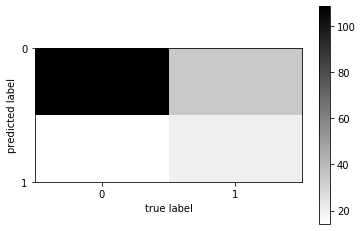

In [56]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test_predict, y_test)
matrix = np.sqrt(matrix)
plt.imshow(matrix, interpolation = 'nearest')
plt.set_cmap('binary')
plt.xticks(range(2))
plt.yticks(range(2))
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.colorbar()

## SVC

In [43]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print(err_train, err_test)

0.10108383101083832 0.10432025951046889


## Principal Component Analysis

In [44]:
len(feature_names)

43

There are 43 features, in order to accelerate the algorithm let's change the dimension of features to 2.

In [45]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_сomponents = pca.fit_transform(X)
principal_df = pd.DataFrame(data = principal_сomponents, columns = ['first_component', 'second_component'])
principal_df.head()

,first_component,second_component
0,-0.004334,1.645418
1,0.084536,-0.208757
2,0.070297,-0.691929
3,0.022844,0.593374
4,0.106788,-0.886491


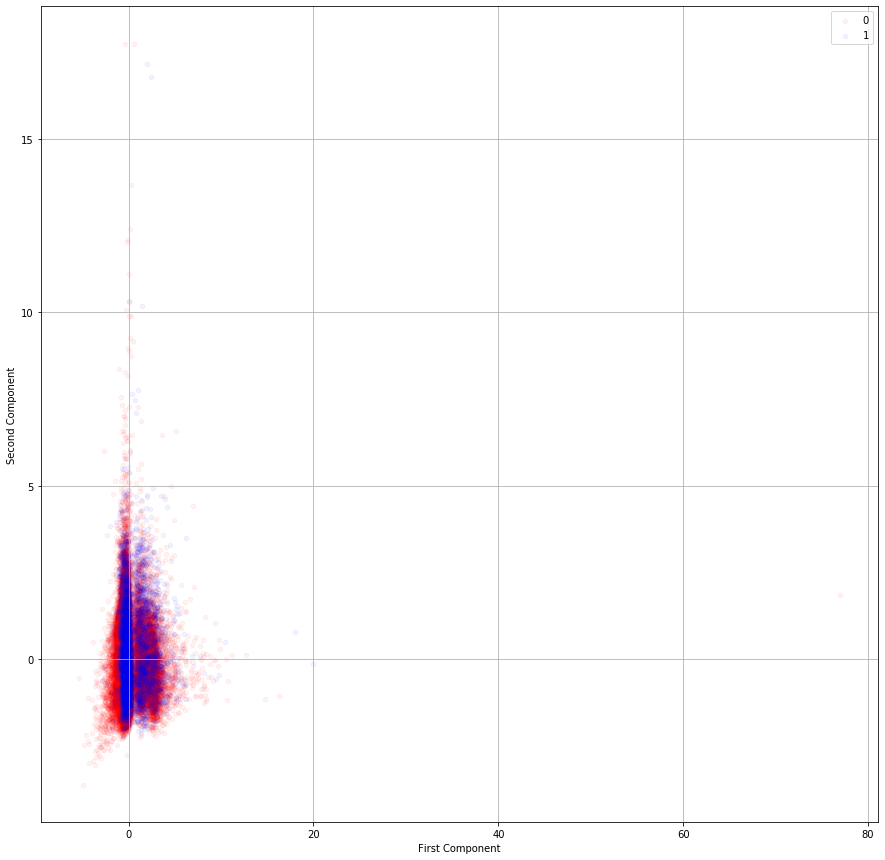

In [46]:
figure = plt.figure(figsize = (15, 15))
ax = figure.add_subplot(1, 1, 1)
ax.set_xlabel('First Component')
ax.set_ylabel('Second Component')
targets = range(2)
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = y == target
    ax.scatter(principal_df.loc[indicesToKeep, 'first_component'], principal_df.loc[indicesToKeep, 'second_component'],
               c = color, s = 20, alpha = 0.05)
ax.legend(targets)
ax.grid()

In [47]:
explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)
print(sum(explained_variance_ratio))

[0.14869377 0.11377108]
0.2624648471896892


26.2% - summary percentage of variance explained by two components

### SVC (PCA)

In [48]:
X_pca_train = pca.fit_transform(X_train)
X_pca_test = pca.fit_transform(X_test)

In [49]:
svc.fit(X_pca_train, y_train)

err_train = np.mean(y_train != svc.predict(X_pca_train))
err_test  = np.mean(y_test  != svc.predict(X_pca_test))

print(err_train, err_test)

0.11631434259171486 0.11781185491005602


Without dimension change:
Error train - 10.11%
Error test - 10.43%

With PCA:
Error train - 11.63%
Error test - 11.78%

Error is increased

Let's check kNN classificator, which had the best result.

### kNN (PCA)

In [50]:
knn.fit(X_pca_train, y_train)

err_train = np.mean(y_train != knn.predict(X_pca_train))
err_test  = np.mean(y_test  != knn.predict(X_pca_test))

print(err_train, err_test)

0.11372325970866116 0.15084046004128576


Without dimension change:
Error train - 9.67%
Error test - 10.24%

With PCA:
Error train - 11.26%
Error test - 14.80%

Pretty interesting, the best classificator has the worst results on test set. Difference between test errors ~ 3%. It can be concluded that kNN is more sensitive on feature dimension change.

###### Let's increase the number of components.

In [51]:
components = range(2, 43, 2) # there are 43 features at all

### SVC

In [52]:
err_train = []
err_test = []
for i in components:
    pca = PCA(n_components=i)
    pca.fit(X)
    X_pca_train = pca.transform(X_train)
    X_pca_test = pca.transform(X_test)
    svc.fit(X_pca_train, y_train)
    err_train.append(np.mean(y_train != svc.predict(X_pca_train)))
    err_test.append(np.mean(y_test  != svc.predict(X_pca_test)))

Min train error 0.09722880525800234 with 24 components
Max train error 0.11653553259392675 with 2 components
Min test error 0.10284576820996756 with 28 components
Max test error 0.11781185491005602 with 2 components


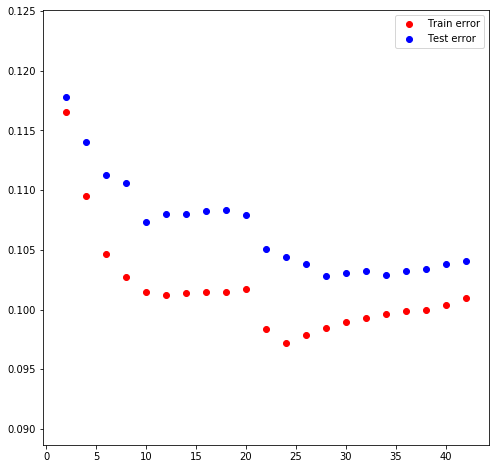

In [53]:
figure = plt.figure(figsize=(8, 8))
ax = figure.add_subplot(1,1,1)
colors = ['r', 'b']
ax.scatter(components, err_train, color=colors[0])
ax.scatter(components, err_test, color=colors[1])
ax.legend(['Train error', 'Test error'])

best_train_result = np.argmin(err_train)
best_test_result = np.argmin(err_test)
worst_train_result = np.argmax(err_train)
worst_test_result = np.argmax(err_test)

print("Min train error {} with {} components".format(err_train[best_train_result], components[best_train_result]))
print("Max train error {} with {} components".format(err_train[worst_train_result], components[worst_train_result]))
print("Min test error {} with {} components".format(err_test[best_test_result], components[best_test_result]))
print("Max test error {} with {} components".format(err_test[worst_test_result], components[worst_test_result]))

### kNN

In [54]:
err_train = []
err_test = []
for i in components:
    pca = PCA(n_components=i)
    pca.fit(X)
    X_pca_train = pca.transform(X_train)
    X_pca_test = pca.transform(X_test)
    knn.fit(X_pca_train, y_train)
    err_train.append(np.mean(y_train != knn.predict(X_pca_train)))
    err_test.append(np.mean(y_test  != knn.predict(X_pca_test)))

Min train error 0.09549088381205169 with 30 components
Max train error 0.1154611811546118 with 2 components
Min test error 0.10173989973459156 with 32 components
Max test error 0.11825420230020643 with 2 components


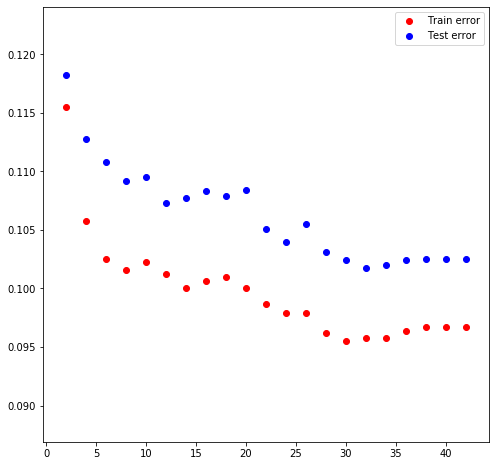

In [55]:
figure = plt.figure(figsize=(8, 8))
ax = figure.add_subplot(1,1,1)
colors = ['r', 'b']
ax.scatter(components, err_train, color=colors[0])
ax.scatter(components, err_test, color=colors[1])
ax.legend(['Train error', 'Test error'])

best_train_result = np.argmin(err_train)
best_test_result = np.argmin(err_test)
worst_train_result = np.argmax(err_train)
worst_test_result = np.argmax(err_test)

print("Min train error {} with {} components".format(err_train[best_train_result], components[best_train_result]))
print("Max train error {} with {} components".format(err_train[worst_train_result], components[worst_train_result]))
print("Min test error {} with {} components".format(err_test[best_test_result], components[best_test_result]))
print("Max test error {} with {} components".format(err_test[worst_test_result], components[worst_test_result]))

The results for both methods are pretty similar. With increasing the number of components, the train and test error is becoming lower, but on the other hand, if there are too many components, these errors are increasing.

We also can see that min test error for kNN is 0.10173989973459156 and without PCA the test error is the same.
But for SVC method using PCA the test error has descreased, but not too much.

### Multi-layer Perceptron Network

In [57]:
from sklearn.neural_network import MLPClassifier

In [58]:
mlp_model = MLPClassifier(hidden_layer_sizes = (100,), solver = 'lbfgs', 
                          activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=42, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [59]:
y_train_predict = mlp_model.predict(X_train)
err_train = np.mean(y_train != y_train_predict)
y_test_predict = mlp_model.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.08288305368597339 0.09429371866705986


### Error vs alpha

Let's pick up an alpha parameter

In [63]:
alpha_arr = np.logspace(-10, 3, 10)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (100,), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_predict = mlp_model.predict(X_train)
    y_test_predict = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_predict))
    test_err.append(np.mean(y_test != y_test_predict))

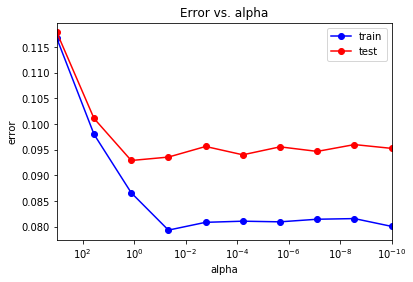

In [75]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

In [76]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.079344013650583 0.0928929519315836


In [71]:
alpha_opt = alpha_arr[test_err == min_test_err][0]
print(alpha_opt)

1.2915496650148828


Now let's repeat learning with optimal alpha value:

In [74]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (100,),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print('Error train: ', np.mean(y_train != y_train_pred))
print('Error test: ', np.mean(y_test != y_test_pred))

Error train:  0.08661168515183114
Error test:  0.0928929519315836


### Error vs layers

In [95]:
hidden_layer_sizes_arr = np.array([1,5,10,50,80,100,200,1000])
test_err = []
train_err = []
for size in hidden_layer_sizes_arr:
    mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (size,), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_predict = mlp_model.predict(X_train)
    y_test_predict = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_predict))
    test_err.append(np.mean(y_test != y_test_predict))

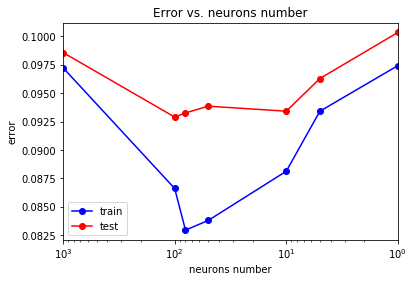

In [96]:
plt.semilogx(hidden_layer_sizes_arr, train_err, 'b-o', label = 'train')
plt.semilogx(hidden_layer_sizes_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.max(hidden_layer_sizes_arr), np.min(hidden_layer_sizes_arr)])
plt.title('Error vs. neurons number')
plt.xlabel('neurons number')
plt.ylabel('error')
plt.legend()
pass

In [97]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

neurons_opt = hidden_layer_sizes_arr[test_err == min_test_err][0]
print(neurons_opt)

0.08294625082946251 0.0928929519315836
100


In [98]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (neurons_opt,),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print('Error train: ', np.mean(y_train != y_train_pred))
print('Error test: ', np.mean(y_test != y_test_pred))

Error train:  0.08661168515183114
Error test:  0.0928929519315836


The optimal neurons number is 100. Let's increase the number of layers with optimal number of neurons and check the 'error vs layers number'

In [99]:
hidden_layer_sizes_arr = np.array([(neurons_opt,), (neurons_opt,neurons_opt,), (neurons_opt,neurons_opt,neurons_opt,), (neurons_opt,neurons_opt,neurons_opt,neurons_opt,)])
sizes = np.array([1,2,3,4])
test_err = []
train_err = []
for size in hidden_layer_sizes_arr:
    mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = size,
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_predict = mlp_model.predict(X_train)
    y_test_predict = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_predict))
    test_err.append(np.mean(y_test != y_test_predict))

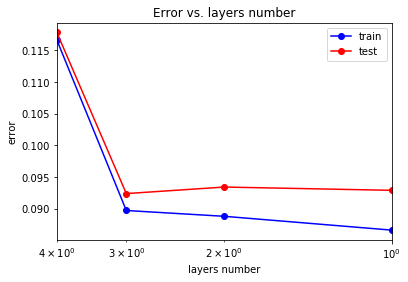

In [100]:
plt.semilogx(sizes, train_err, 'b-o', label = 'train')
plt.semilogx(sizes, test_err, 'r-o', label = 'test')
plt.xlim([np.max(sizes), np.min(sizes)])
plt.title('Error vs. layers number')
plt.xlabel('layers number')
plt.ylabel('error')
plt.legend()
pass

The optimal number of layers number is 1

Final training with all optimal parameters:

In [101]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (neurons_opt,),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print('Error train: ', np.mean(y_train != y_train_pred))
print('Error test: ', np.mean(y_test != y_test_pred))

Error train:  0.08661168515183114
Error test:  0.0928929519315836


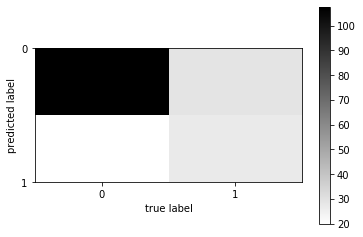

In [102]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test_pred, y_test)
matrix = np.sqrt(matrix)
plt.imshow(matrix, interpolation = 'nearest')
plt.set_cmap('binary')
plt.xticks(range(2))
plt.yticks(range(2))
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.colorbar()
pass

In [103]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     11966
           1       0.65      0.46      0.54      1598

    accuracy                           0.91     13564
   macro avg       0.79      0.71      0.74     13564
weighted avg       0.90      0.91      0.90     13564



The prediction that a person actually has the deposit is still not very accurate, but it is better now then it was at the beginning (check the first confusion matrix above).

### Multi-layer Perceptron Network with PCA

In [106]:
components = range(2, 43, 2)
err_train = []
err_test = []
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (neurons_opt,),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
for i in components:
    pca = PCA(n_components=i)
    pca.fit(X)
    X_pca_train = pca.transform(X_train)
    X_pca_test = pca.transform(X_test)
    mlp_model.fit(X_pca_train, y_train)
    err_train.append(np.mean(y_train != mlp_model.predict(X_pca_train)))
    err_test.append(np.mean(y_test  != mlp_model.predict(X_pca_test)))

Min train error 0.08465257370366859 with 38 components
Max train error 0.11663032830916042 with 2 components
Min test error 0.09304040106163373 with 38 components
Max test error 0.11781185491005602 with 2 components


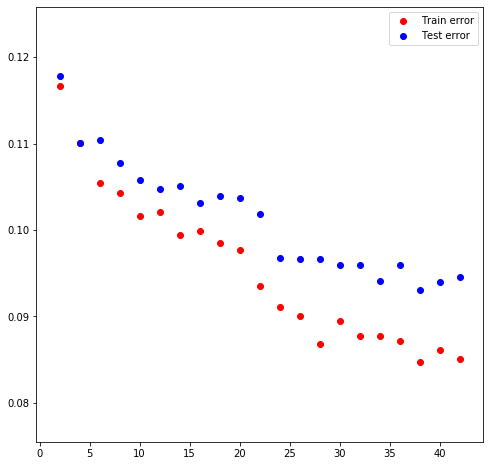

In [107]:
figure = plt.figure(figsize=(8, 8))
ax = figure.add_subplot(1,1,1)
colors = ['r', 'b']
ax.scatter(components, err_train, color=colors[0])
ax.scatter(components, err_test, color=colors[1])
ax.legend(['Train error', 'Test error'])

best_train_result = np.argmin(err_train)
best_test_result = np.argmin(err_test)
worst_train_result = np.argmax(err_train)
worst_test_result = np.argmax(err_test)

print("Min train error {} with {} components".format(err_train[best_train_result], components[best_train_result]))
print("Max train error {} with {} components".format(err_train[worst_train_result], components[worst_train_result]))
print("Min test error {} with {} components".format(err_test[best_test_result], components[best_test_result]))
print("Max test error {} with {} components".format(err_test[worst_test_result], components[worst_test_result]))

Min train and min test error are both reached with 38 components.

Let's pick up all global parameters again for this number of components

In [108]:
alpha_arr = np.logspace(-10, 3, 10)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (100,), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    pca = PCA(n_components=38)
    pca.fit(X)
    X_pca_train = pca.transform(X_train)
    X_pca_test = pca.transform(X_test)
    mlp_model.fit(X_pca_train, y_train)
    train_err.append(np.mean(y_train != mlp_model.predict(X_pca_train)))
    test_err.append(np.mean(y_test  != mlp_model.predict(X_pca_test)))

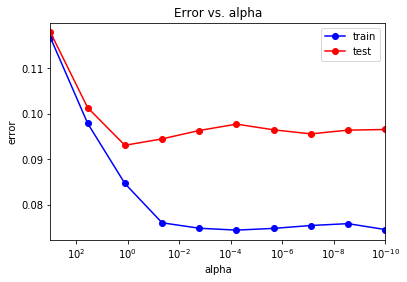

In [109]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

In [110]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.07441463645843208 0.09304040106163373


In [111]:
alpha_opt = alpha_arr[test_err == min_test_err][0]
print(alpha_opt)

1.2915496650148828


In [112]:
hidden_layer_sizes_arr = np.array([1,5,10,50,80,100,200,1000])
test_err = []
train_err = []
for size in hidden_layer_sizes_arr:
    mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (size,), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    pca = PCA(n_components=38)
    pca.fit(X)
    X_pca_train = pca.transform(X_train)
    X_pca_test = pca.transform(X_test)
    mlp_model.fit(X_pca_train, y_train)
    train_err.append(np.mean(y_train != mlp_model.predict(X_pca_train)))
    test_err.append(np.mean(y_test  != mlp_model.predict(X_pca_test)))

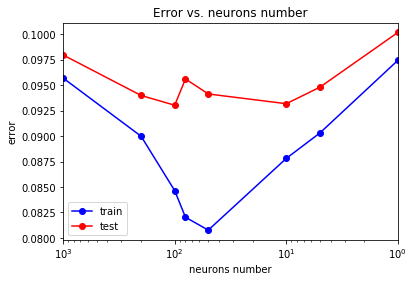

In [113]:
plt.semilogx(hidden_layer_sizes_arr, train_err, 'b-o', label = 'train')
plt.semilogx(hidden_layer_sizes_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.max(hidden_layer_sizes_arr), np.min(hidden_layer_sizes_arr)])
plt.title('Error vs. neurons number')
plt.xlabel('neurons number')
plt.ylabel('error')
plt.legend()
pass

In [114]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

neurons_opt = hidden_layer_sizes_arr[test_err == min_test_err][0]
print(neurons_opt)

0.08076594937908807 0.09304040106163373
100


In [116]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (neurons_opt,), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
pca = PCA(n_components=38)
pca.fit(X)
X_pca_train = pca.transform(X_train)
X_pca_test = pca.transform(X_test)
mlp_model.fit(X_pca_train, y_train)

y_train_pred = mlp_model.predict(X_pca_train)
y_test_pred = mlp_model.predict(X_pca_test)
print('Error train: ', np.mean(y_train != y_train_pred))
print('Error test: ', np.mean(y_test != y_test_pred))

Error train:  0.08465257370366859
Error test:  0.09304040106163373


The PCA for MLPClassifier increased the test error but only for 0.01%. While the test error decreased for 0.2%.

## RandomForest and GradientBoosting

### RandomForest

In [37]:
from collections import OrderedDict
from sklearn import ensemble
import warnings
warnings.filterwarnings("ignore")

# Range of `n_estimators` values to explore.
min_estimators = 10
max_estimators = 100

ensemble_clfs = [
    ("RandomForestClassifier, max_features='log2'",
        ensemble.RandomForestClassifier(warm_start=True, max_features='log2',
                               oob_score=True,
                               random_state=15)),
]

oob_error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)
error_train = OrderedDict((label, []) for label, _ in ensemble_clfs)
error_test = OrderedDict((label, []) for label, _ in ensemble_clfs)

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X_train, y_train)
        y_test_predict = clf.predict(X_test)

        error_train[label].append((i, np.mean(y_train != clf.predict(X_train))))
        error_test[label].append((i, np.mean(y_test  != y_test_predict)))

        oob_error = 1 - clf.oob_score_
        oob_error_rate[label].append((i, oob_error))

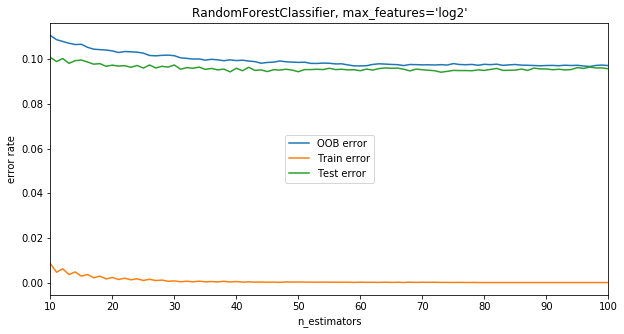

In [38]:
plt.figure(figsize=(10,5))

for label, clf_err in oob_error_rate.items():
    xs, ys = zip(*clf_err)
    plt.title(label)
    plt.plot(xs, ys, label="OOB error")

for label, clf_err in error_train.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label="Train error")

for label, clf_err in error_test.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label="Test error")

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("error rate")
plt.legend(loc="center")
plt.show()

In [42]:
rf = ensemble.RandomForestClassifier(n_estimators = 100, max_features="log2", random_state=15)
rf.fit(X_train, y_train)
y_test_predict = rf.predict(X_test)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.0 0.09576820996756119


### Gradient Boosting

In [43]:
gb = ensemble.GradientBoostingClassifier(n_estimators=1000)
gb.fit(X_train, y_train) 
err_train = np.mean(y_train != gb.predict(X_train))
err_test  = np.mean(y_test  != gb.predict(X_test))

print(err_train, err_test)

0.06111163775397352 0.0926717782365084


In [45]:
gb = ensemble.GradientBoostingClassifier(n_estimators=100)
gb.fit(X_train, y_train) 
err_train = np.mean(y_train != gb.predict(X_train))
err_test  = np.mean(y_test  != gb.predict(X_test))

print(err_train, err_test)

0.08894997946092836 0.09650545561781186


With the same number of trees (100) GB shows worse results than RF, but 1000 trees decreased the test error on 0.3%.
Let's check the dependence of the number of trees on error around of 1000 trees (between 500 and 1500).

In [46]:
oob_error, test_error, train_error = [], [], []

for n in range(500, 1500, 200):
     gb = ensemble.GradientBoostingClassifier(n_estimators=n, subsample=0.5, random_state=42)
     gb.fit(X_train, y_train) 
     train_error.append(np.mean(y_train != gb.predict(X_train)))
     test_error.append(np.mean(y_test  != gb.predict(X_test)))
     oob_error.append(gb.oob_improvement_)

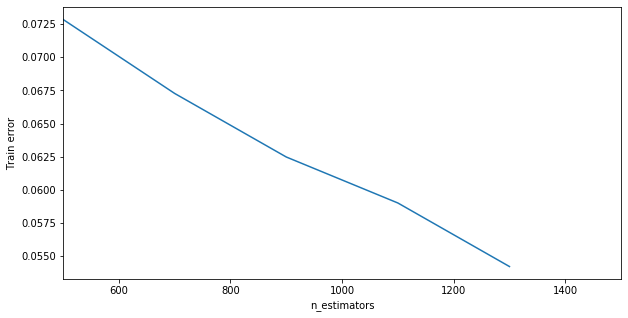

Min train error 0.054191550541915504 with 1300 estimators


In [51]:
estimators = list(range(500, 1500, 200))
plt.figure(figsize=(10,5))
plt.plot(range(500, 1500, 200), train_error, label='Gradient Boosting Trees')
plt.xlim(500, 1500)
plt.xlabel("n_estimators")
plt.ylabel("Train error")
plt.show()
print('Min train error {} with {} estimators'.format(np.min(train_error), estimators[np.argmin(train_error)]))

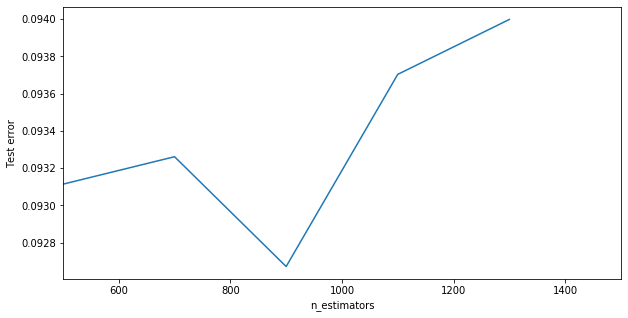

Min test error 0.0926717782365084 with 900 estimators


In [52]:
plt.figure(figsize=(10,5))
plt.plot(range(500, 1500, 200), test_error, label='Gradient Boosting Trees')
plt.xlim(500, 1500)
plt.xlabel("n_estimators")
plt.ylabel("Test error")
plt.show()
print('Min test error {} with {} estimators'.format(np.min(test_error), estimators[np.argmin(test_error)]))

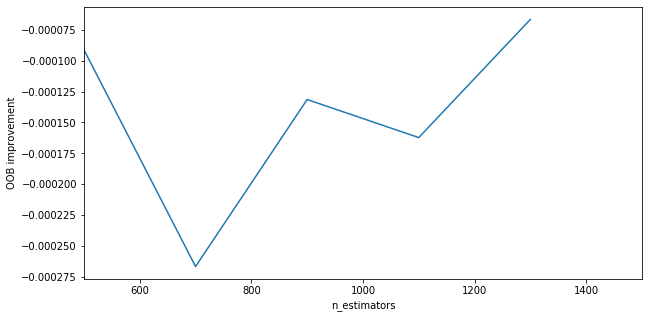

In [53]:
oob_improvement = [oob[-1] for oob in oob_error]
plt.figure(figsize=(10,5))
plt.plot(range(500, 1500, 200), oob_improvement, label='Gradient Boosting Trees')
plt.xlim(500, 1500)
plt.xlabel("n_estimators")
plt.ylabel("OOB improvement")
plt.show()

Gradient Boosting showed the best results with 900 estimators and it is the best result comparing with all other classifiers.